# Spotify dataset — Exploratory Data Analysis (EDA)
Author: Palash Rupani 
Date: 05-09-2025

In [5]:

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

plt.style.use('default')   # keep default plotting style
sns.set_context("talk")

# create outputs folder
OUT_DIR = "eda_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

#used to save figures to the output folder
def savefig(fname, dpi=150, bbox='tight'):
    path = os.path.join(OUT_DIR, fname)
    plt.savefig(path, dpi=dpi, bbox_inches=bbox)
    print("Saved:", path)


In [7]:
data_path = r"../data/tracks.csv"
df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head()


Shape: (586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
# Cell 3: basic info, dtypes, missing values
display(df.info())
display(df.describe(include='all').T)   # summary for all columns
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
pd.concat([missing, missing_pct.rename("pct_missing")], axis=1).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,586672,586672,35iwgR4jXetI318WEWsa1Q,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,586601,446474,Summertime,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,586672.0,NaN,NaN,NaN,27.570053,18.370642,0.0,13.0,27.0,41.0,100.0
duration_ms,586672.0,NaN,NaN,NaN,230051.167286,126526.087418,3344.0,175093.0,214893.0,263867.0,5621218.0
explicit,586672.0,NaN,NaN,NaN,0.044086,0.205286,0.0,0.0,0.0,0.0,1.0
artists,586672,114030,['Die drei ???'],3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_artists,586672,115062,['3meJIgRw7YleJrmbpbJK6S'],3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,586672,19700,1998-01-01,2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,586672.0,NaN,NaN,NaN,0.563594,0.166103,0.0,0.453,0.577,0.686,0.991
energy,586672.0,NaN,NaN,NaN,0.542036,0.251923,0.0,0.343,0.549,0.748,1.0


,0,pct_missing
name,71,0.01
id,0,0.00
popularity,0,0.00
duration_ms,0,0.00
explicit,0,0.00
artists,0,0.00
id_artists,0,0.00
release_date,0,0.00
danceability,0,0.00
energy,0,0.00


In [9]:
# Cell 4: duplicates + sample duplicates
print("Total rows:", len(df))
print("Duplicate rows:", df.duplicated().sum())

# If you have a track_id column, check uniqueness
if "track_id" in df.columns:
    print("Unique track_id:", df['track_id'].nunique())
else:
    print("'track_id' column not found.")


Total rows: 586672
Duplicate rows: 0
'track_id' column not found.


In [10]:
# Cell 5: candidate numeric features (update as needed)
candidate_features = [
    "danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms","key","mode"
]

# intersect with existing columns
num_cols = [c for c in candidate_features if c in df.columns]


# fallback to numeric columns if none of the above present
if not num_cols:
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric features used for EDA:", num_cols)
df[num_cols].head()

Numeric features used for EDA: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key', 'mode']


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode
0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,126903,0,1
1,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,98200,0,1
2,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,181640,1,1
3,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,176907,7,1
4,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,163080,3,0


Saved: eda_outputs\histograms.png


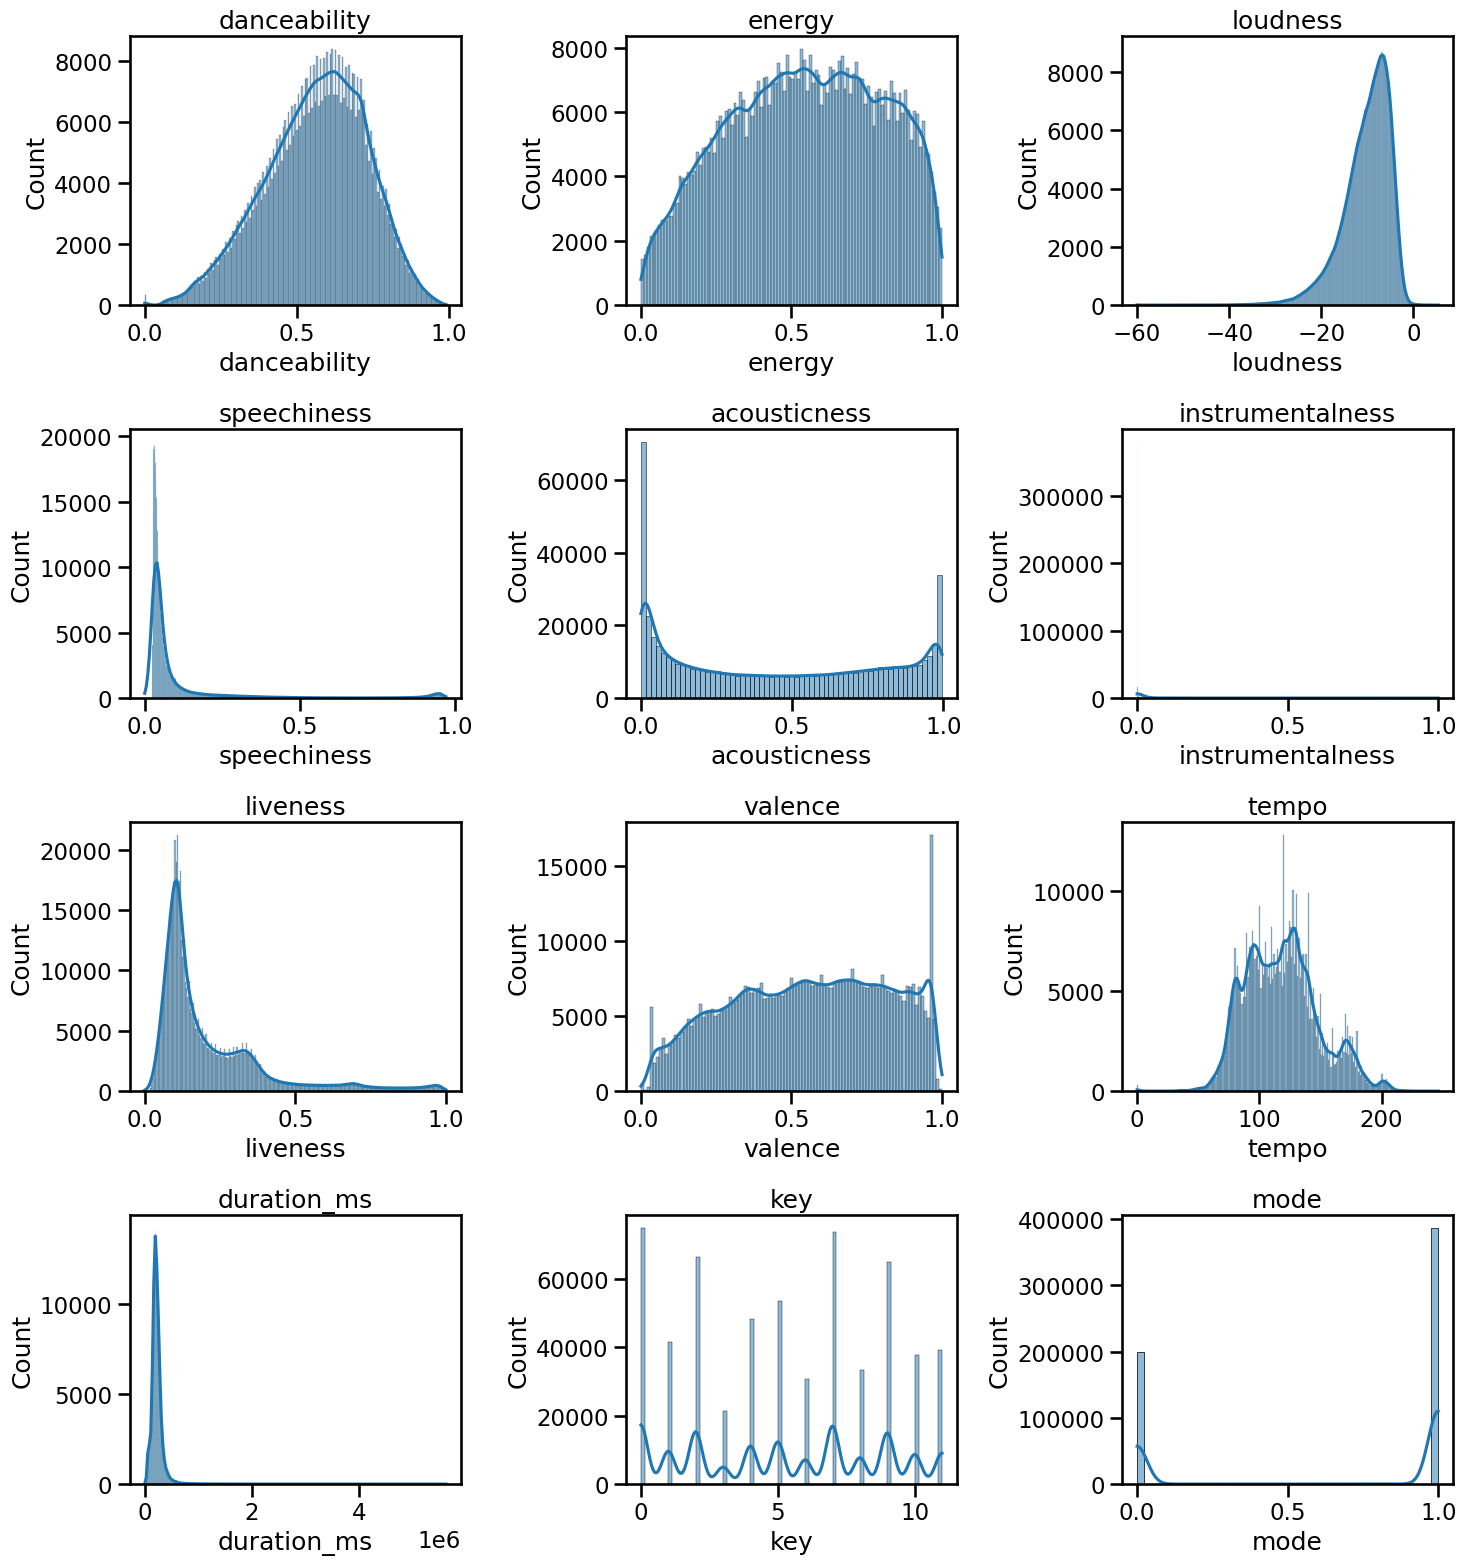

In [11]:
# Cell 6: histograms for numeric features
n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols
plt.figure(figsize=(cols*5, rows*4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
savefig("histograms.png")
plt.show()

Saved: eda_outputs\boxplots.png


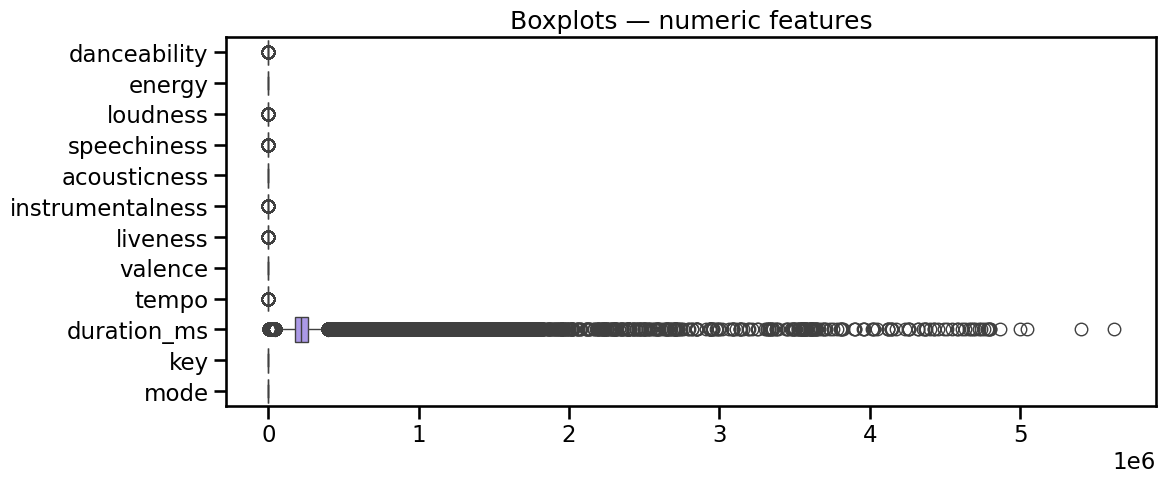

In [12]:
# Cell 7: boxplots (one per feature)
plt.figure(figsize=(12, max(4, len(num_cols)*0.4)))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplots — numeric features")
savefig("boxplots.png")
plt.show()


Saved: eda_outputs\correlation_heatmap_readable.png


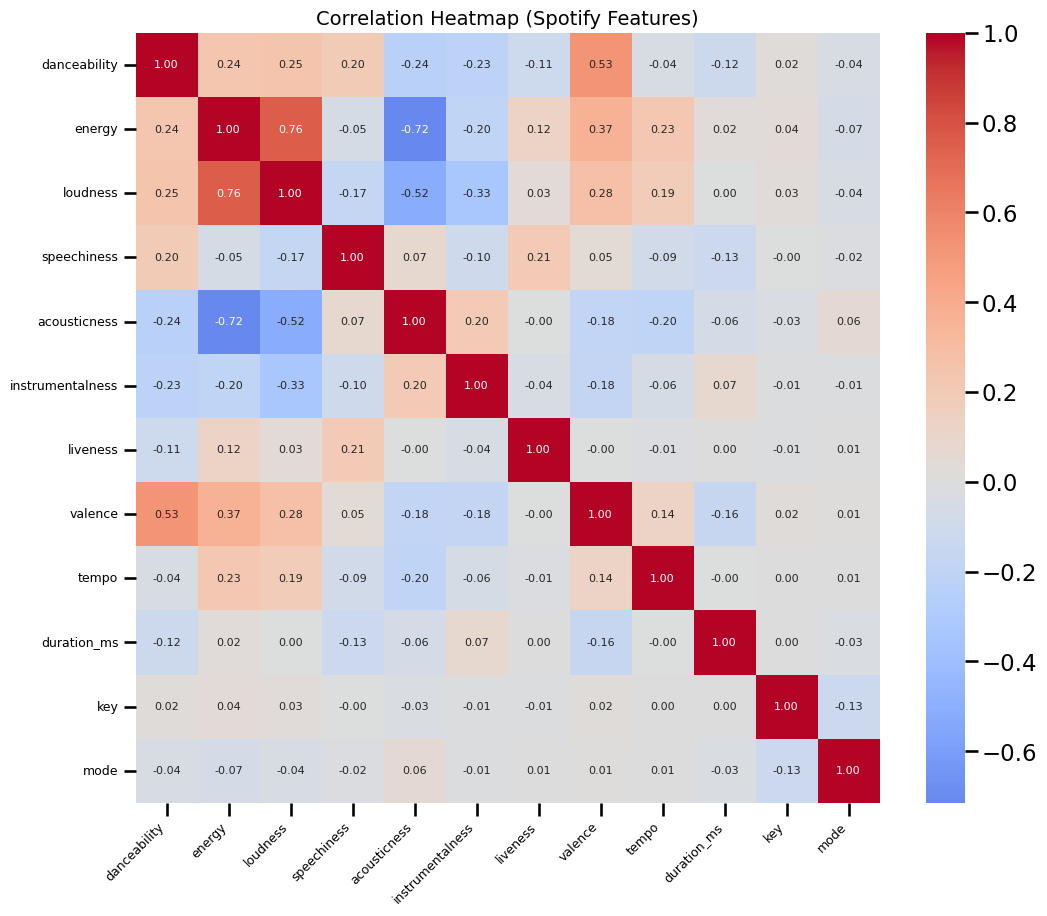

In [13]:
# Better correlation heatmap with clearer numbers
plt.figure(figsize=(12, 10))  # make it bigger
corr = df[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",       # 2 decimal places
    cmap="coolwarm",
    center=0,
    annot_kws={"size": 8}  # smaller font for numbers
)

plt.title("Correlation Heatmap (Spotify Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
savefig("correlation_heatmap_readable.png")
plt.show()


Saved: eda_outputs\pairplot_subset.png


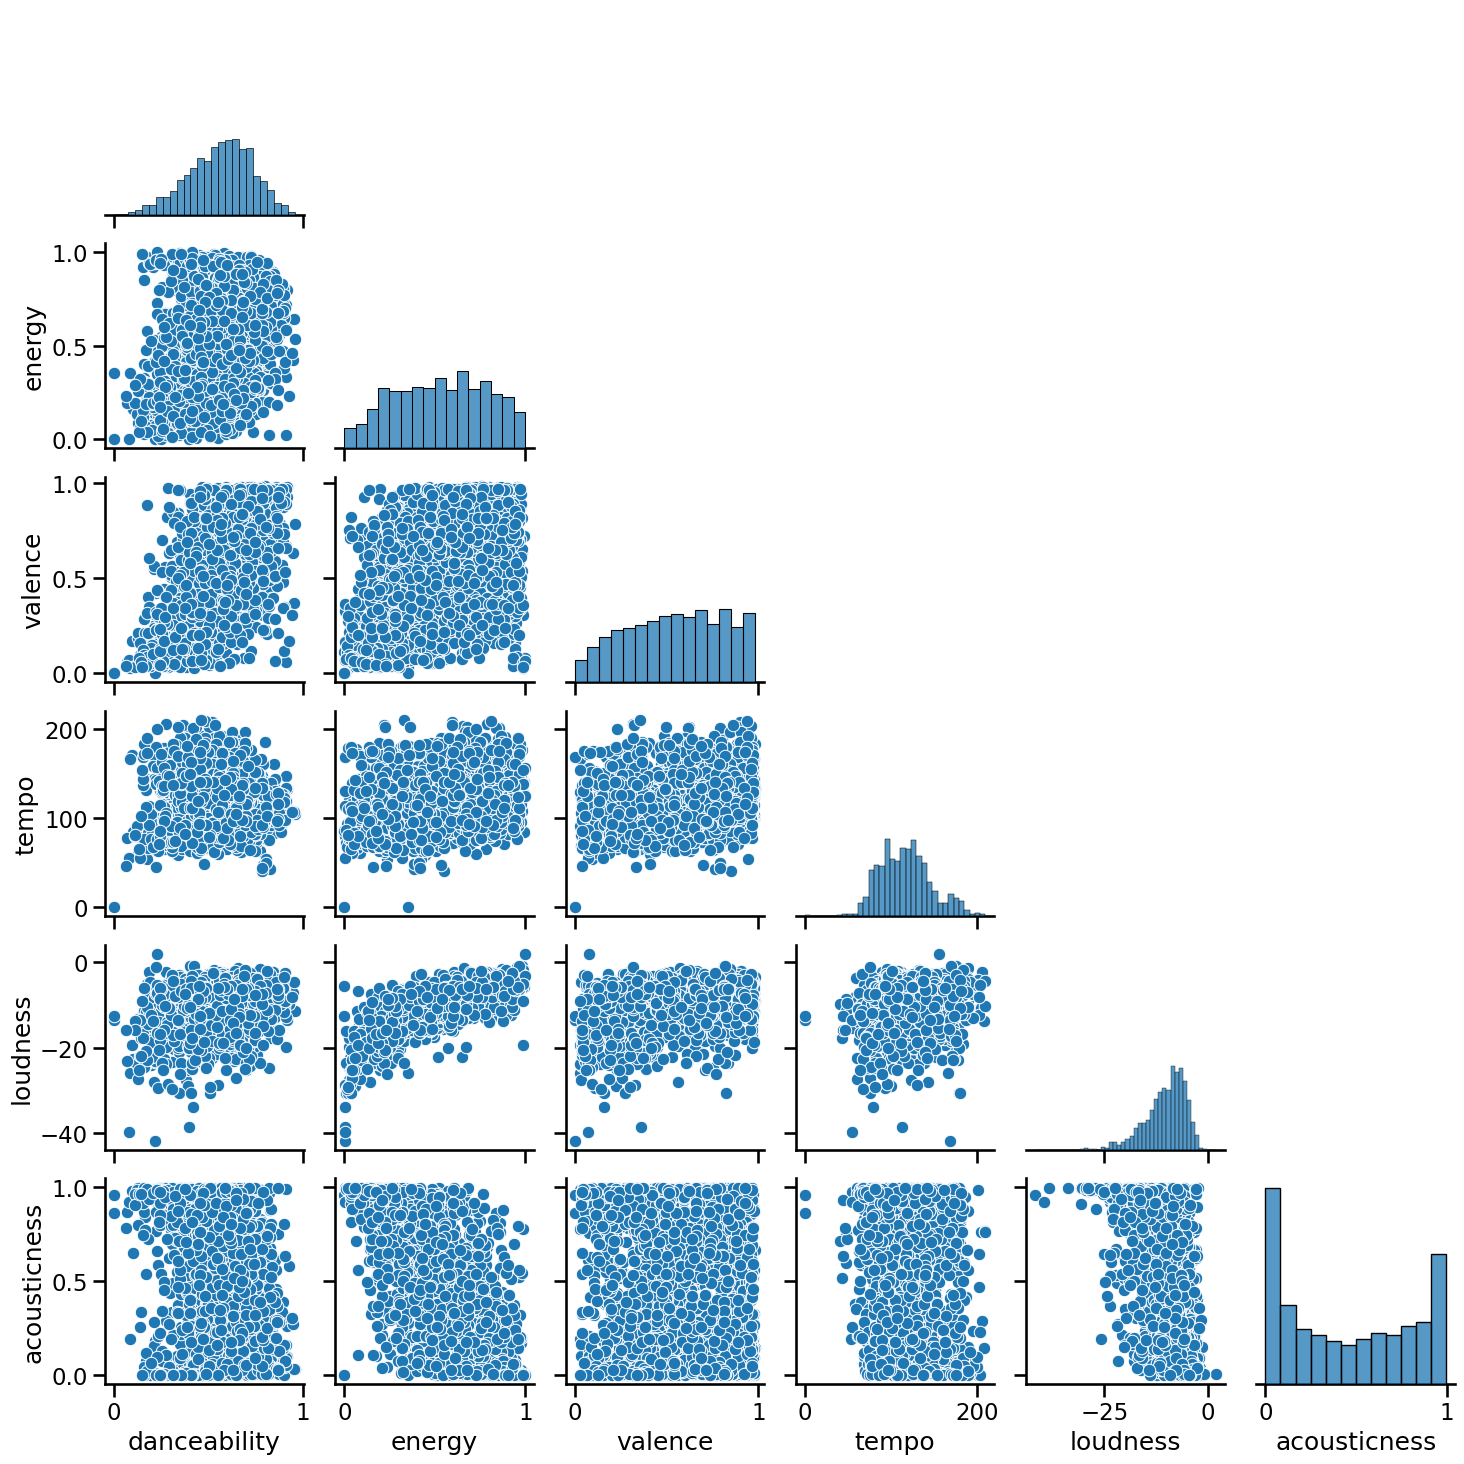

In [14]:
# Cell 9: pairplot for a small subset (choose up to 6 features)
subset = ["danceability","energy","valence","tempo","loudness","acousticness"]
subset = [s for s in subset if s in df.columns]
sns.pairplot(df[subset].dropna().sample(min(2000, len(df))), corner=True)
savefig("pairplot_subset.png")
plt.show()


In [15]:
# Cell 10: top artists, top tracks, key/mode distribution
if "artist_name" in df.columns:
    print("Top artists:\n", df['artist_name'].value_counts().head(15))
if "track_name" in df.columns:
    print("\nTop tracks:\n", df['track_name'].value_counts().head(15))
for cat in ["key","mode"]:
    if cat in df.columns:
        print(f"\n{cat} value counts:\n", df[cat].value_counts().sort_index())



key value counts:
 key
0     74950
1     41736
2     66552
3     21535
4     48220
5     53614
6     30856
7     73779
8     33460
9     65128
10    37710
11    39132
Name: count, dtype: int64

mode value counts:
 mode
0    200174
1    386498
Name: count, dtype: int64


In [16]:
# Cell 11: skewness detection and safe log1p transform suggestion
skews = df[num_cols].skew().sort_values(ascending=False)
skews = skews.to_frame("skew").round(3)
skews


,skew
duration_ms,10.326
speechiness,3.694
instrumentalness,2.270
liveness,2.045
tempo,0.403
acousticness,0.151
key,-0.001
energy,-0.131
valence,-0.152
danceability,-0.331


Saved: eda_outputs\pca_scree.png


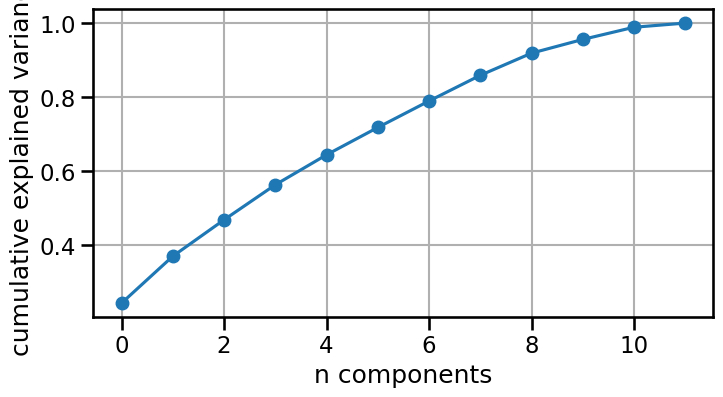

Cumulative variance for first 2/5/10 comps: [0.24226069 0.36913949 0.46762752 0.56243591 0.64355397 0.71748818
 0.78915058 0.85862915 0.91863195 0.95576271]


['eda_outputs\\pca_for_eda.pkl']

In [17]:
# Cell 12: PCA explained variance to decide dimensionality
features_for_pca = num_cols  # or choose subset
X = df[features_for_pca].dropna()
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
pca = PCA(n_components=min(30, Xs.shape[1]))
pca.fit(Xs)
evr = pca.explained_variance_ratio_
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(evr), marker='o')
plt.xlabel("n components")
plt.ylabel("cumulative explained variance")
plt.grid(True)
savefig("pca_scree.png")
plt.show()
print("Cumulative variance for first 2/5/10 comps:", np.cumsum(evr)[:10])
# save scaler and PCA if you want
joblib.dump(scaler, os.path.join(OUT_DIR, "scaler_for_eda.pkl"))
joblib.dump(pca, os.path.join(OUT_DIR, "pca_for_eda.pkl"))


In [19]:
# Cell 13: basic cleaning choices (example)
df_clean = df.copy()

# 1) Drop duplicates
df_clean = df_clean.drop_duplicates()

# 2) Simple missing value strategy: drop rows with missing numeric features used for clustering
df_clean = df_clean.dropna(subset=num_cols)

# 3) (Optional) Winsorize / clip extreme values -- example clipping tempo to [0.5, 99.5] percentile
for c in ["tempo","duration_ms"]:
    if c in df_clean.columns:
        lo, hi = df_clean[c].quantile([0.005, 0.995])
        df_clean[c] = df_clean[c].clip(lower=lo, upper=hi)

print("Clean shape:", df_clean.shape)
df_clean[num_cols].describe().T
# Save cleaned version
clean_path = os.path.join("../data", "spotify_tracks_clean.csv")
df_clean.to_csv(clean_path, index=False)
print("Saved cleaned CSV:", clean_path)


Clean shape: (586672, 20)
Saved cleaned CSV: ../data\spotify_tracks_clean.csv


## Next steps (for modeling / clustering)
1. Choose features for clustering (use `num_cols` or PCA latent components).
2. Standardize features (we used StandardScaler in PCA). Save scaler for production.
3. Try clustering on PCA reduced space (e.g., 5–10 components) and/or on scaled original features.
4. Tune cluster hyperparameters (k for kmeans/gmm/spectral, eps/min_samples for DBSCAN).
5. Evaluate using silhouette, Davies-Bouldin, Calinski-Harabasz, and choose composite score.
6. Use the `recommender` approach: cosine similarity in latent space to produce top-N recommendations.

